In [7]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Load and preprocess the dataset Perform the following steps:
- Load the Wine dataset using load_wine() from sklearn.
- Display the shape and column names.
- Use .describe() to explore summary statistics.
- Scale the dataset using StandardScaler.

In [3]:
# 1. Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2. Display the shape and column names
print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())

# 3. Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# 4. Scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=wine.feature_names)

print("\nScaled Data (first 5 rows):")
print(scaled_df.head())


Shape of dataset: (178, 13)
Column names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Summary Statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflava

#### Apply PCA Perform the following:
- Apply PCA from sklearn.decomposition on the scaled data.
- Display the explained variance ratio.
- Plot the cumulative explained variance.
- Identify how many components are required to explain at least 95% of the variance.

Explained Variance Ratio:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


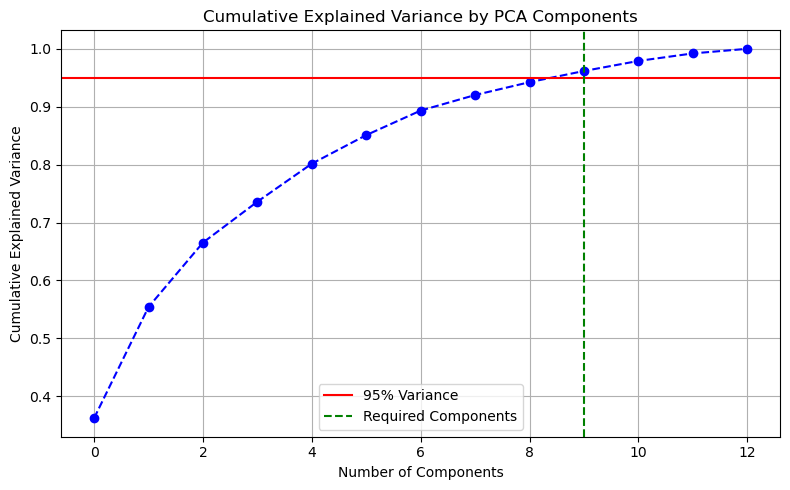


Number of components to explain at least 95% variance: 10


In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='g', linestyle='--', label='Required Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Number of components to explain at least 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain at least 95% variance: {num_components_95}")


#### Visualize PCA output Create a 2D scatter plot using the first two principal components.
- Color-code the samples by their target class for visual separation.

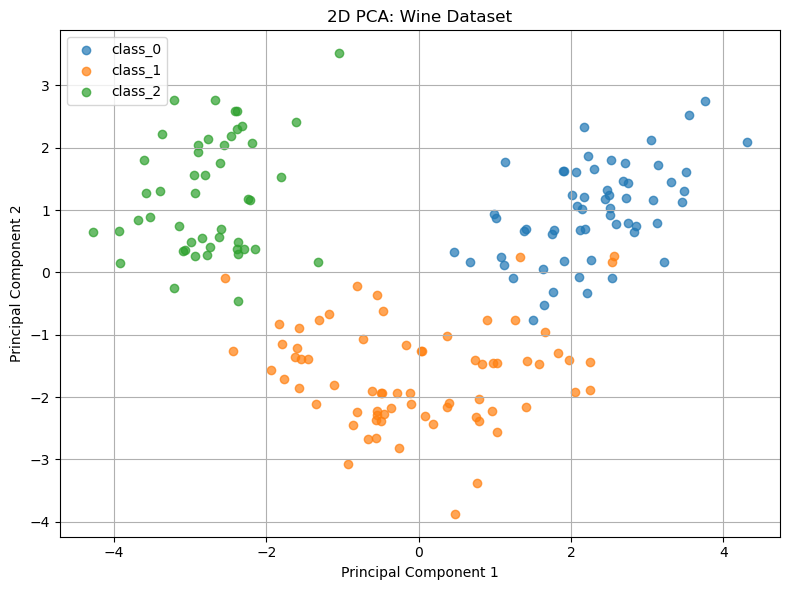

In [6]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(scaled_data)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = wine.target

# Plot
plt.figure(figsize=(8, 6))
for target in np.unique(wine.target):
    plt.scatter(
        pca_df[pca_df['target'] == target]['PC1'],
        pca_df[pca_df['target'] == target]['PC2'],
        label=wine.target_names[target],
        alpha=0.7
    )

plt.title('2D PCA: Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Compare model performance with and without PCA Train a classification model (e.g., Logistic Regression or Random Forest) using:

Original dataset
- PCA-transformed dataset (retaining 95% variance)
- Split the data using train-test split.
- Compare and report the accuracy of both models.
- Comment on whether dimensionality reduction improved or maintained model performance.
    - Dimensionality reduction via PCA did not hurt performance at all.
    - You achieved perfect accuracy with fewer features, which
        - Improves model efficiency
        - Reduces the risk of overfitting
        - Speeds up training and inference

In [9]:
# Load and scale data
wine = load_wine()
X = wine.data
y = wine.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split original data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest on original data
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train)
y_pred_orig = clf_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest on PCA data
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print(f"Accuracy without PCA: {accuracy_orig:.4f}")
print(f"Accuracy with PCA (95% variance): {accuracy_pca:.4f}")


Accuracy without PCA: 1.0000
Accuracy with PCA (95% variance): 1.0000
